In [8]:
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import soundfile as sf

In [17]:

def metronome(bpm,timsig,s=[]):
	fs = 44100
	bar = 4
	while True:
		if (60*fs%bpm != 0):
			fs+=1
		else:
			break

	samplehop= int((60/bpm)*fs)
	x = np.zeros(int(fs*((60/bpm)*bar*timsig)))
	barc=0
	countsig=timsig
	si=0
	for counter in range(len(x)):
		if (counter%samplehop==0):
			imp = signal.unit_impulse((int(fs*((60/bpm)*bar*timsig))), [counter])
			if (s[si]==1):
				if(countsig==timsig):
					x = x+imp
	                
				else:
					x = x+imp
			elif (s[si]==0):
				x = x
	            
	                 
	            
	                
			counter+=1
			countsig-=1
			si+=1
			if(countsig==0):
				countsig = timsig
				barc+=1
				si=0
				if(barc==bar):
					break
	    
	onset_gen = np.where(x>0)
	#write('static/Data/GenSounds/Pulsegen.wav', fs, kick1.astype(np.int16))                  
	return  np.pad(x, (samplehop), 'constant'),onset_gen[0],fs

[     0  17640  35280  52920  70560  88200 105840 123480 141120 158760
 176400 194040 211680 229320 246960 264600]


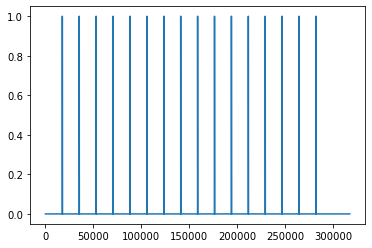

In [18]:
x1,onsets,fs=metronome(150,4,[1,1,1,1])
print(onsets)
plt.plot(x1)

In [19]:
def isochrone(ratio,bpm,timsig,s=[]):
	fs = 44100
	bar = 4*(1/ratio)
	while True:
		if (60*fs%bpm != 0):
			fs+=1
		else:
			break

	samplehop= int(((60/bpm)*fs)*ratio)
	x = np.zeros(int((samplehop*bar*timsig)))
	barc=0
	countsig=timsig
	si=0
	for counter in range(len(x)):
		if (counter%samplehop==0):
            #Create Impulses at positon([Counter]) and of Length (SampleHop*TimeSig*Bars)
			imp = signal.unit_impulse((int((samplehop)*bar*timsig)), [counter])
            #Add impulses to a zero signal to generate pulse train
			if (s[si]==1):
				if(countsig==timsig):
					x = x+imp
	                
				else:
					x = x+imp
			elif (s[si]==0):
				x = x
	            
	                 
	            
	                
			counter+=1
			countsig-=1
			si+=1
			if(countsig==0):
				countsig = timsig
				barc+=1
				si=0
				if(barc==bar):
					break
    
	return np.pad(x, (samplehop), 'constant'),np.where(x>0)[0]

[     0   4410   8820  13230  17640  22050  26460  30870  35280  39690
  44100  48510  52920  57330  61740  66150  70560  74970  79380  83790
  88200  92610  97020 101430 105840 110250 114660 119070 123480 127890
 132300 136710 141120 145530 149940 154350 158760 163170 167580 171990
 176400 180810 185220 189630 194040 198450 202860 207270 211680 216090
 220500 224910 229320 233730 238140 242550 246960 251370 255780 260190
 264600 269010 273420 277830]
[     0  35280  70560 105840 141120 176400 211680 246960]


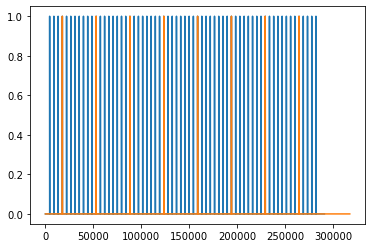

In [30]:
x,onsets1=isochrone((1/4),150,4,[1,1,1,1])
x1,onsets,fs=metronome(150,4,[1,0,1,0])
plt.plot(x)
plt.plot(x1)
print(onsets1)
print(onsets)

In [87]:
sample_sound = '/Users/noelalben/Downloads/Old Downloads/judd-madden-drum-samples/Hi Hat/Hi Hat 3.wav'
y, s = librosa.load(sample_sound, sr=)
zeros = np.zeros(x.size-y.size)
y = np.append(y,zeros)
Y = fft(y)
X = fft(x)
kick1 = np.real(ifft(X*Y))
sf.write('PulsegenTry.wav', kick1, 44100, 'PCM_24') 

In [7]:
import IPython.display as ipd
ipd.Audio('PulsegenTry2.wav')

In [146]:
def metronome(bpm,timsig,s=[]):
	fs = 44100
	bar = 4
	while True:
		if (60*fs%bpm != 0):
			fs+=1
		else:
			break

	samplehop= int(((60/bpm)*fs))
	x = np.zeros(int(samplehop*bar*timsig))
	barc=0
	countsig=timsig
	si=0
	for counter in range(len(x)):
		if (counter%samplehop==0):
            #Create Impulses at positon([Counter]) and of Length (SampleHop*TimeSig*Bars)
			imp = signal.unit_impulse((int(samplehop)*bar*timsig), [counter])
            #Add impulses to a zero signal to generate pulse train
			if (s[si]==1):
				if(countsig==timsig):
					x = x+imp
	                
				else:
					x = x+imp
			elif (s[si]==0):
				x = x
	            
	                 
	            
	                
			counter+=1
			countsig-=1
			si+=1
			if(countsig==0):
				countsig = timsig
				barc+=1
				si=0
				if(barc==bar):
					break
    
	return x

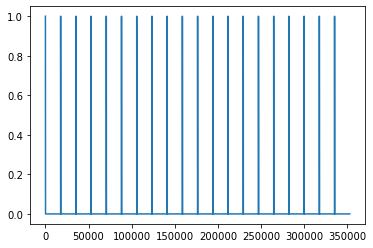

In [147]:
x=metronome(150,5,[1,1,1,1,1])
plt.plot(x)

In [88]:
import IPython.display as ipd
ipd.Audio('PulsegenTry.wav')

In [168]:
def metronome2(ratio,bpm,timsig,s=[]):
	fs = 44100
	bar = 4
	while True:
		if (60*fs%bpm != 0):
			fs+=1
		else:
			break

	samplehop= int(((60/bpm)*fs)*ratio)
	x = np.zeros(int(samplehop*bar*timsig))
	barc=0
	countsig=timsig
	si=0
	for counter in range(len(x)):
		if (counter%samplehop==0):
            #Create Impulses at positon([Counter]) and of Length (SampleHop*TimeSig*Bars)
			imp = signal.unit_impulse((int(samplehop)*bar*timsig), [counter])
            #Add impulses to a zero signal to generate pulse train
			if (s[si]==1):
				if(countsig==timsig):
					x = x+imp
	                
				else:
					x = x+imp
			elif (s[si]==0):
				x = x
	            
	                 
	            
	                
			counter+=1
			countsig-=1
			si+=1
			if(countsig==0):
				countsig = timsig
				barc+=1
				si=0
				if(barc==bar):
					break
    
	return np.pad(x, (samplehop), 'constant'),np.where(x>0)[0]

[     0  13230  26460  39690  52920  66150  79380  92610 105840 119070
 132300 145530 158760 171990 185220 198450]
[    0  4410  8820 13230 17640 22050 26460 30870 35280 39690 44100 48510
 52920 57330 61740 66150 70560 74970 79380 83790]


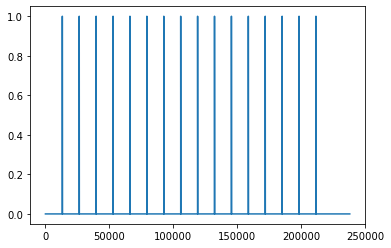

In [199]:
x1,onsets1=metronome2(0.75,150,4,[1,1,1,1])
print(onsets1)
print(onsets)
plt.plot(x1)
#plt.plot(x1)

In [144]:
import IPython.display as ipd
ipd.Audio('PulsegenTry2.wav')

In [182]:
x1,onsets=metronome2((1/4),150,5,[1,1,1,1,1])

In [183]:
sample_sound = '/Users/noelalben/Downloads/Old Downloads/judd-madden-drum-samples/Hi Hat/Hi Hat 3.wav'
y, s = librosa.load(sample_sound, sr=44100)
zeros = np.zeros(x1.size-y.size)
y = np.append(y,zeros)
Y = fft(y)
X = fft(x1)
kick1 = np.real(ifft(X*Y))
sf.write('PulsegenTry23.wav', kick1, 44100, 'PCM_24') 

In [184]:
ipd.Audio('PulsegenTry23.wav')